In [1]:
# This program uses LSTM to predict the closing stock price of apple inc based on the last 60 days

In [3]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-10-20')

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747407
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880666
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-14,144.520004,138.190002,144.309998,138.380005,88512300.0,138.380005
2022-10-17,142.899994,140.270004,141.070007,142.410004,85250900.0,142.410004
2022-10-18,146.699997,140.610001,145.490005,143.750000,99136600.0,143.750000
2022-10-19,144.949997,141.500000,141.690002,143.860001,61758300.0,143.860001
2022-10-20,145.889999,142.649994,143.020004,143.389999,64522000.0,143.389999


In [9]:
df.shape

(2719, 6)

Text(0, 0.5, 'Closing Price USD ($)')

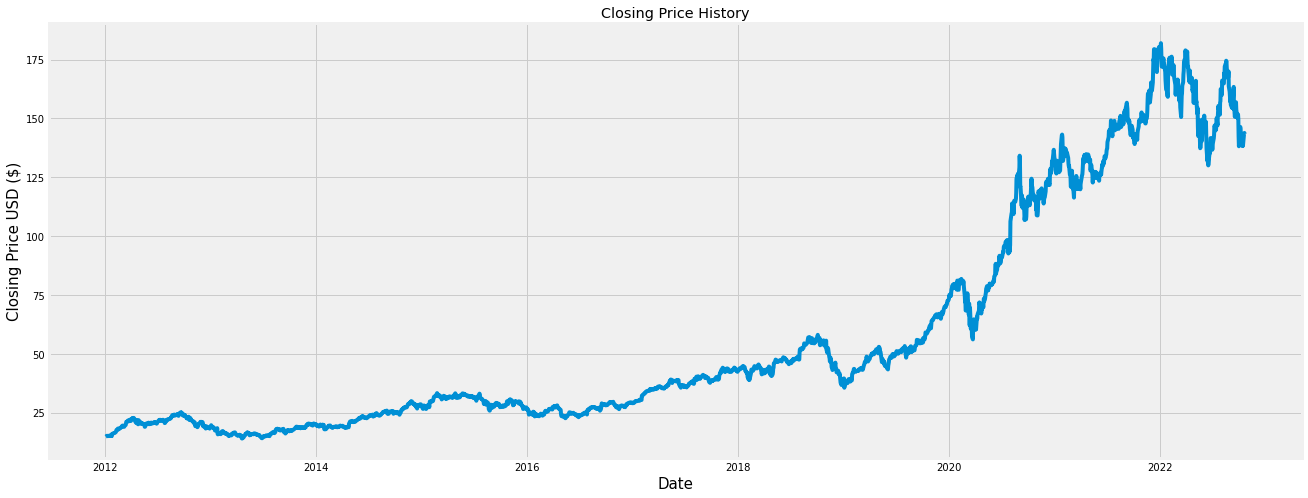

In [11]:
# Visualize closing price history
plt.figure(figsize=(20, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Closing Price USD ($)', fontsize=15)
